<a href="https://colab.research.google.com/github/HugoRodriguesL/DataScience-UnimedTech-DIO/blob/main/Aula07_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_excel('/content/drive/MyDrive/Datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Datasets/Salvador.xlsx')

df = pd.concat([df1, df2, df3, df4, df5])
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df['Ano_Venda'] = df['Data'].dt.year
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df['trimestre_venda'] = df['Data'].dt.quarter
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]


df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


<h1>Visualização de Dados</h1>

In [2]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

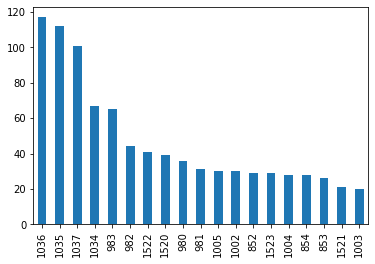

In [3]:
df['LojaID'].value_counts(ascending=False).plot.bar()

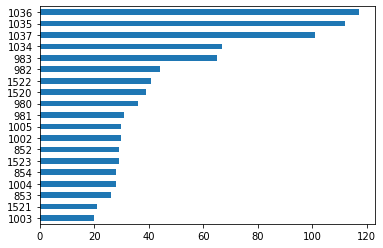

In [4]:
df['LojaID'].value_counts(ascending=True).plot.barh();

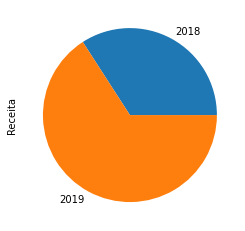

In [5]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

<h2> Plotando Vendas por Cidade - Customizando o Gráfico </h2>

In [6]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

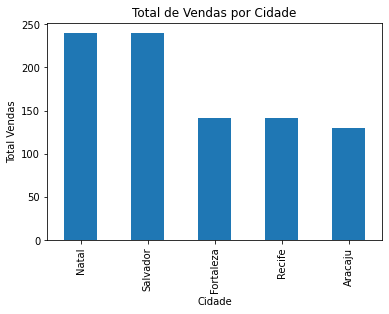

In [7]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

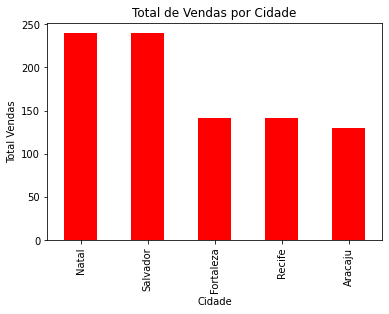

In [8]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Estilizando o gráfico - [Documentação](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [9]:
plt.style.use('ggplot')

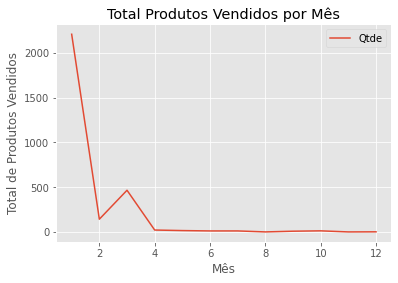

In [10]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()

In [11]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

Trabalhando apenas com as vendas de 2019

In [16]:
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

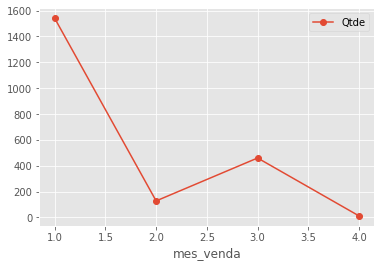

In [18]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel = 'Mês'
plt.ylabel = 'Total de Produtos Vendidos'
plt.legend();

Grafico do tipo Histograma

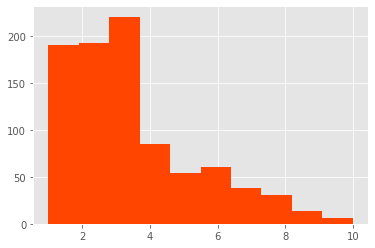

In [24]:
plt.hist(df['Qtde'], color='orangered');

Gráfico de Dispersão

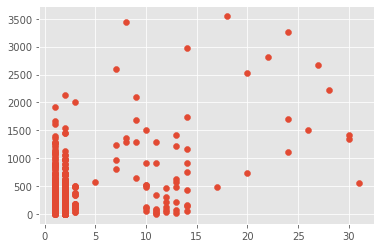

In [27]:
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita']);

Gerando gráfico e salvando a imagem em .PNG

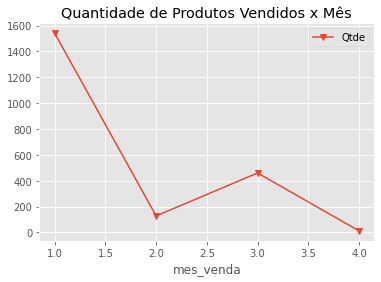

In [29]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel = 'Mês'
plt.ylabel = 'Total Produtos Vendidos';
plt.legend()
plt.savefig('Grafico QTDE x Mes.png')